# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

資料預處理

In [119]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [120]:
#載入手寫辨識的資料集

from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()
y_train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [121]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [122]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255


In [123]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)
y_Train_OneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

建立模型

In [124]:
from keras.models import Sequential
from keras.layers import Dense

#宣告採用序列模型
model = Sequential()

#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
#建構輸入2層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))


#建構輸出層 # Add Input layer, 隱藏層(hidden layer) 有 10個輸出變數
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
#https://ithelp.ithome.com.tw/articles/10191725

In [125]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


訓練模型


In [126]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


In [127]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.2365 - accuracy: 0.9290 - val_loss: 0.1119 - val_accuracy: 0.9665
Epoch 2/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.0947 - accuracy: 0.9706 - val_loss: 0.0918 - val_accuracy: 0.9719
Epoch 3/10
48000/48000 [==============================] - 5s 108us/step - loss: 0.0634 - accuracy: 0.9795 - val_loss: 0.0949 - val_accuracy: 0.9719
Epoch 4/10
48000/48000 [==============================] - 5s 115us/step - loss: 0.0470 - accuracy: 0.9854 - val_loss: 0.0823 - val_accuracy: 0.9763
Epoch 5/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0988 - val_accuracy: 0.9750
Epoch 6/10
48000/48000 [==============================] - 6s 116us/step - loss: 0.0319 - accuracy: 0.9893 - val_loss: 0.0913 - val_accuracy: 0.9758
Epoch 7/10
48000/48000 [==============================] - 4s 9

以圖形顯示訓練過程

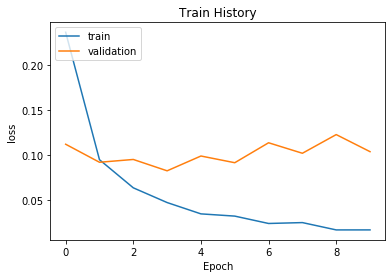

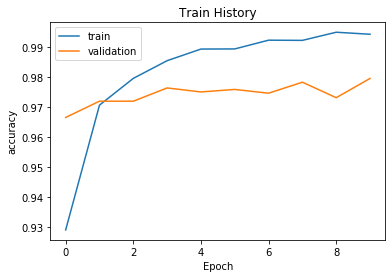

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'loss','val_loss')   
show_train_history(train_history,'accuracy','val_accuracy')

評估模型準確率

In [129]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 31us/step

accuracy= 0.9797999858856201


# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異 
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

Ans:若在新增一層輸入層,相較下準確率會有所提升. 0.9786->0.9798